# 6.4: Supervised Machine Learning: Regression

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data prep for regression analysis
#### 3. Regression analysis
#### 4. Exporting

## 1. Importing Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Brichaelle\Flavors of Cocoa'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'prepared data', 'cleaned_sets.csv'), index_col = False)

## 2. Data Prep for regression analysis

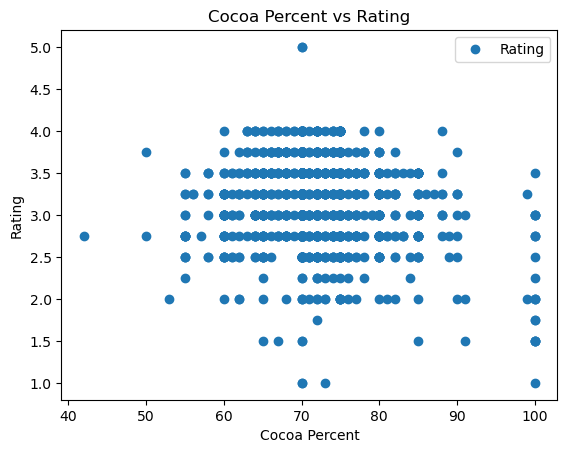

In [5]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Cocoa Percent', y='Rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Cocoa Percent vs Rating')  
plt.xlabel('Cocoa Percent')  
plt.ylabel('Rating')  
plt.show()

#### Hypothesis:

The Cocoa percent does in fact have no direct relationship to the rating of chocolate

In [6]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Cocoa Percent'].values.reshape(-1,1)
y = df['Rating'].values.reshape(-1,1)

In [7]:
X

array([[63],
       [70],
       [70],
       ...,
       [65],
       [62],
       [65]], dtype=int64)

In [8]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [9]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 3. Regression Analysis

In [10]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [11]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

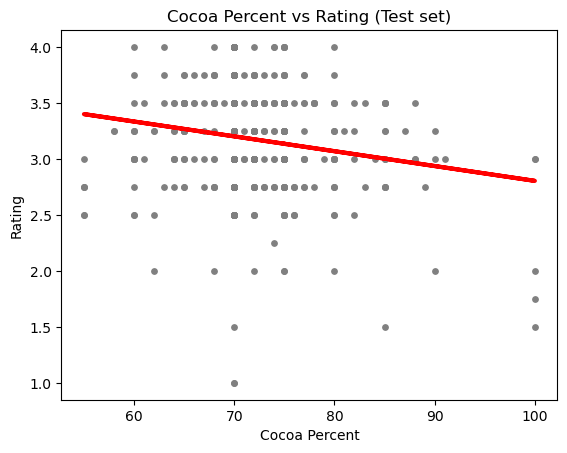

In [13]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs Rating (Test set)')
plot_test.xlabel('Cocoa Percent')
plot_test.ylabel('Rating')
plot_test.show()

#### Because of the lack of relation between the two variables, the line has a negative slope with data points scattered across the chart

In [14]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [15]:
# Print the model summary statistics. Performance evaluation happens here

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0132443]]
Mean squared error:  0.2095667333558342
R2 score:  0.01796193063355267


In [16]:
y_predicted

array([[3.13516298],
       [3.17489588],
       [3.20138448],
       [3.20138448],
       [3.06894148],
       [3.40004898],
       [3.20138448],
       [3.13516298],
       [3.25436168],
       [3.26760598],
       [3.28085028],
       [3.20138448],
       [3.26760598],
       [3.20138448],
       [3.13516298],
       [3.06894148],
       [3.00271998],
       [3.17489588],
       [3.20138448],
       [3.20138448],
       [3.20138448],
       [3.16165158],
       [3.40004898],
       [2.80405547],
       [3.33382748],
       [3.13516298],
       [3.13516298],
       [3.22787308],
       [3.20138448],
       [3.22787308],
       [3.17489588],
       [3.20138448],
       [3.20138448],
       [3.20138448],
       [3.13516298],
       [3.20138448],
       [3.17489588],
       [3.28085028],
       [3.17489588],
       [3.20138448],
       [3.13516298],
       [3.26760598],
       [3.20138448],
       [3.40004898],
       [3.20138448],
       [3.33382748],
       [3.10867438],
       [3.135

In [17]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.50,3.135163
1,2.75,3.174896
2,2.50,3.201384
3,3.25,3.201384
4,3.25,3.068941
5,2.75,3.400049
6,3.50,3.201384
7,2.50,3.135163
8,3.50,3.254362
9,3.50,3.267606


In [18]:
# X_Predict train

y_predicted_train = regression.predict(X_train) 

In [19]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [20]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0132443]]
Mean squared error:  0.2276547385843832
R2 score:  0.03018658404952157


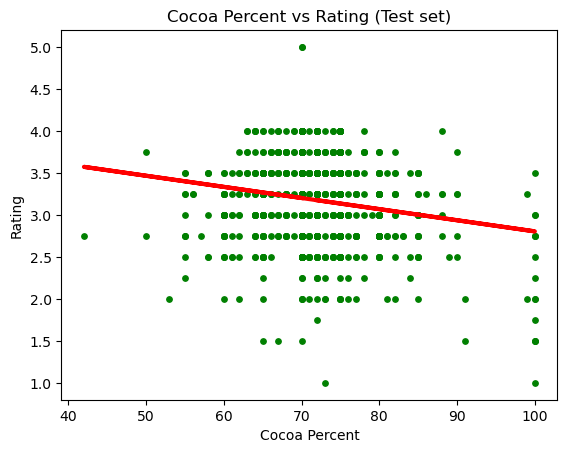

In [21]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs Rating (Test set)')
plot_test.xlabel('Cocoa Percent')
plot_test.ylabel('Rating')
plot_test.show()

#### The hypothesis is further supported here with this chart

## 4. Exporting

In [22]:
df.to_csv(os.path.join(path, 'Data','prepared data', 'regression_analysis.csv'))